<a href="https://colab.research.google.com/github/mohamedalaouiysf/TimeSeries/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dpa.xlsx to dpa.xlsx


In [3]:
# Charger les données DPAE
df = pd.read_excel('dpa.xlsx')

In [4]:
df.head()

,Année,Trimestre,﻿Dernier jour du mois,Durée de contrat,Nature de contrat,DPAE (brut),DPAE (cvs)
0,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222287,321417
1,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267406,324373
2,2000,2,2000-04-30,Contrat de plus d'un mois,CDI,274633,282960
3,2000,2,2000-05-31,Contrat de plus d'un mois,CDI,256064,283773
4,2000,2,2000-06-30,Contrat de plus d'un mois,CDI,248450,280461


In [5]:
print(df.dtypes)

Année                     int64
Trimestre                 int64
﻿Dernier jour du mois    object
Durée de contrat         object
Nature de contrat        object
DPAE (brut)               int64
DPAE (cvs)                int64
dtype: object


In [6]:
df = df.rename(columns={'﻿Dernier jour du mois': 'Dernier jour du mois'})

In [7]:
df['Dernier jour du mois'] = pd.to_datetime(df['Dernier jour du mois'])
df.dtypes

Année                            int64
Trimestre                        int64
Dernier jour du mois    datetime64[ns]
Durée de contrat                object
Nature de contrat               object
DPAE (brut)                      int64
DPAE (cvs)                       int64
dtype: object

In [8]:
df.set_index('Dernier jour du mois', inplace=True)

In [9]:
df_cdi = df[df['Nature de contrat']=='CDI']
df_cdd = df[df['Nature de contrat']!='CDI']

In [10]:
df_cdd

,Année,Trimestre,Durée de contrat,Nature de contrat,DPAE (brut),DPAE (cvs)
Dernier jour du mois,,,,,,
2000-02-29,2000,1,Contrat de plus d'un mois,CDD de plus d'un mois,222287,321417
2000-03-31,2000,1,Contrat de plus d'un mois,CDD de plus d'un mois,267406,324373
2000-12-31,2000,4,Contrat de plus d'un mois,CDD de plus d'un mois,203868,315242
2001-02-28,2001,1,Contrat de plus d'un mois,CDD de plus d'un mois,206800,318447
2001-03-31,2001,1,Contrat de plus d'un mois,CDD de plus d'un mois,247699,307696
...,...,...,...,...,...,...
2022-06-30,2022,2,Contrat de plus d'un mois,CDD de plus d'un mois,451693,401949
2022-08-31,2022,3,Contrat de plus d'un mois,CDD de plus d'un mois,335646,418876
2022-10-31,2022,4,Contrat de plus d'un mois,CDD de plus d'un mois,382254,392120


In [11]:
df_cdd.drop(['Durée de contrat','Nature de contrat'],axis=1)
df_cdi.drop(['Durée de contrat','Nature de contrat'],axis=1)

,Année,Trimestre,DPAE (brut),DPAE (cvs)
Dernier jour du mois,,,,
2000-04-30,2000,2,274633,282960
2000-05-31,2000,2,256064,283773
2000-06-30,2000,2,248450,280461
2000-07-31,2000,3,244460,282616
2000-11-30,2000,4,298927,297091
...,...,...,...,...
2022-01-31,2022,1,504710,404626
2022-09-30,2022,3,685656,440368
2022-11-30,2022,4,425323,424394


<Axes: xlabel='Dernier jour du mois'>

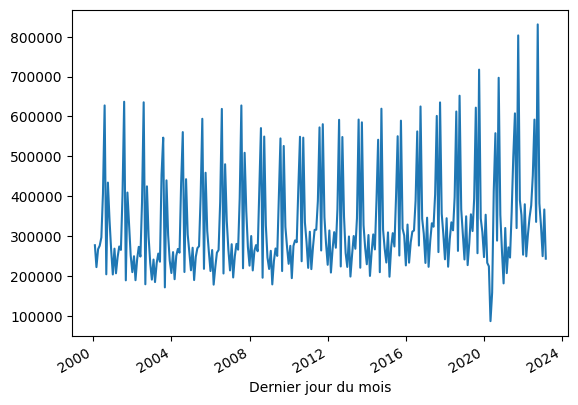

In [12]:
df_cdd['DPAE (brut)'].plot()

<Axes: xlabel='Dernier jour du mois'>

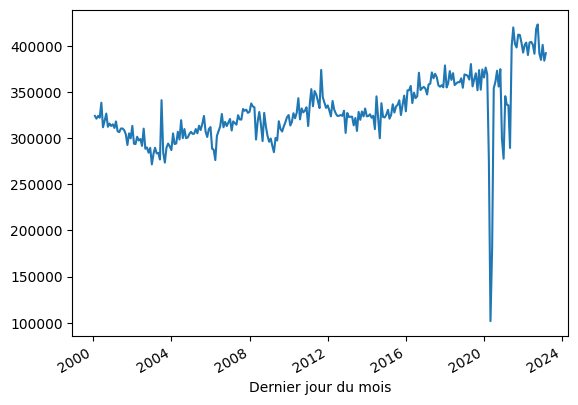

In [13]:
df_cdd['DPAE (cvs)'].plot()

<Axes: xlabel='Dernier jour du mois'>

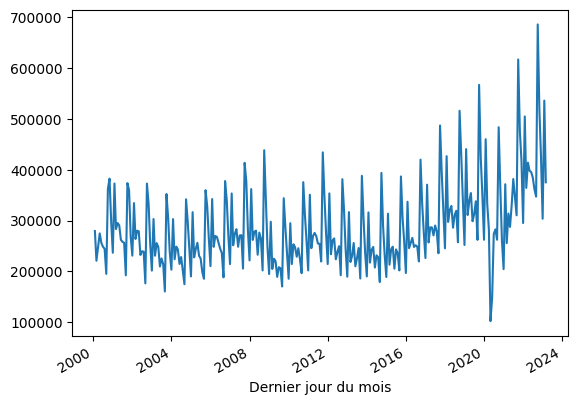

In [14]:
df_cdi['DPAE (brut)'].plot()

In [ ]:
piv1 = pd.pivot_table(df_cdd, index=['Trimestre'],columns=['Année'])
piv1.head()

DPAE (brut)                                               \
Année               2000           2001           2002           2003   
Trimestre                                                               
1          255606.666667  241008.000000  227149.000000  219492.000000   
2          326543.666667  313430.333333  302266.666667  315354.666667   
3          421970.666667  411712.333333  413116.666667  385991.333333   
4          269307.333333  263995.000000  240825.666667  249649.333333   

                                                                       \
Année               2004           2005           2006           2007   
Trimestre                                                               
1          234104.333333  236216.333333  222042.000000  241897.666667   
2          319697.000000  314929.333333  303065.333333  314063.666667   
3          404465.000000  423614.333333  435066.333333  451880.000000   
4          259912.666667  262295.333333  272903.333333  287144.666667   

                                         ...     DPAE (cvs)                 \
Année               2008           2009  ...           2014           2015   
Trimestre                                ...                                 
1          259131.000000  226667.333333  ...  324328.333333  325998.333333   
2          318226.666667  304316.000000  ...  326754.333333  333218.333333   
3          438666.000000  427713.666667  ...  320152.666667  334373.000000   
4          263479.000000  275937.333333  ...  323904.666667  337491.333333   

                                                                       \
Année               2016           2017           2018           2019   
Trimestre                                                               
1          353761.000000  355221.000000  362653.333333  366884.666667   
2          343922.666667  369012.000000  364083.333333  367080.666667   
3          356531.000000  360012.000000  360582.333333  365706.000000   
4          354840.000000  364138.666667  363214.000000  364593.000000   

                                                                  
Année               2020           2021           2022      2023  
Trimestre                                                         
1          340649.666667  339458.333333  398736.666667  388421.5  
2          212397.333333  370018.333333  403612.000000       NaN  
3          363712.666667  404664.000000  411504.000000       NaN  
4          317572.333333  403123.000000  392971.333333       NaN  

[4 rows x 48 columns]

<Axes: xlabel='Trimestre'>

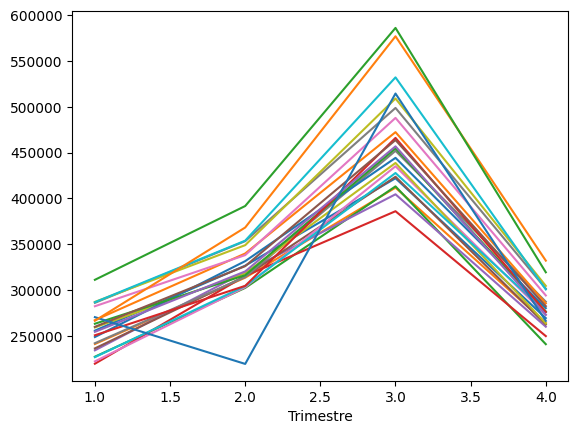

In [ ]:
piv1['DPAE (brut)'].plot(legend = None)

<Axes: xlabel='Trimestre'>

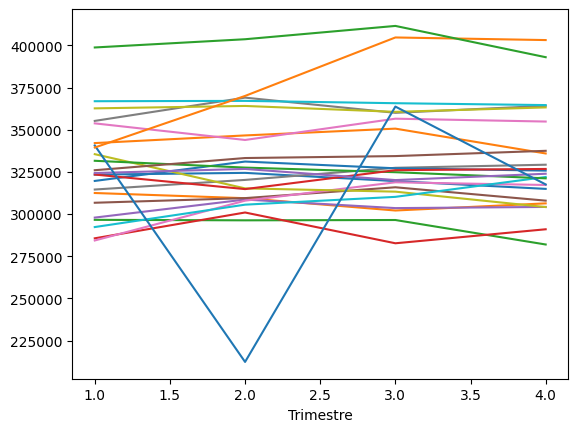

In [ ]:
piv1['DPAE (cvs)'].plot(legend = None)

In [ ]:
dpae